   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

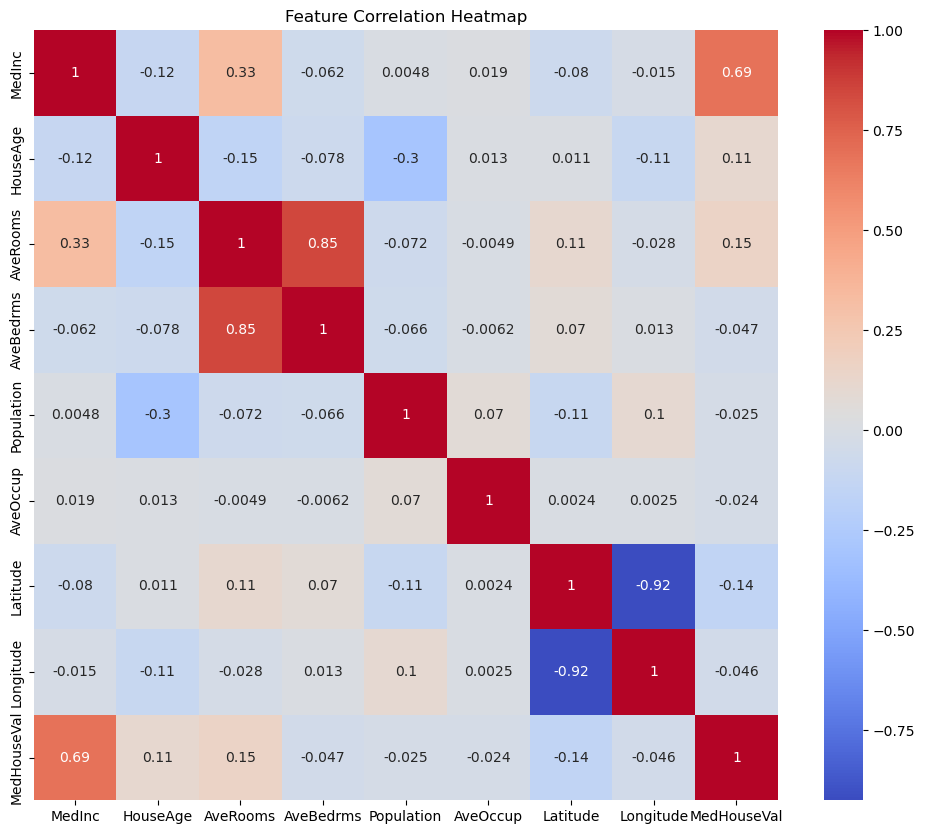

Intercept: 0.01729564528337546
Coefficients: [ 0.4447578  -0.02814968  0.01683623]
R2 Score: 0.49717158850807075
Mean Squared Error: 0.6589108649336336


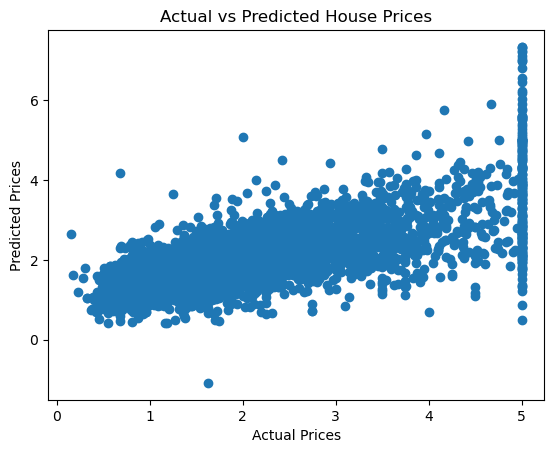

In [3]:
# California Housing Price Prediction using Linear Regression

# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 📌 Step 2: Load Dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# Display first 5 rows
print(df.head())

# 📌 Step 3: Data Exploration
print(df.info())
print(df.describe())
print(df.isnull().sum())

# 📌 Step 4: Visualise Correlations
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# 📌 Step 5: Select Features and Target
X = df[['MedInc', 'AveRooms', 'HouseAge']]  # Example features
y = df['MedHouseVal']

# 📌 Step 6: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 7: Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# 📌 Step 8: Model Coefficients
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)

# 📌 Step 9: Make Predictions
y_pred = lr.predict(X_test)

# 📌 Step 10: Evaluate Model
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# 📌 Step 11: Plot Actual vs Predicted Prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()